In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#from matplotlib import colors
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
from sklearn.cluster import *
from sklearn.datasets import *

['NanumGothic']


## Dataset Generation

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons

np.random.seed(0)
n_samples = 1500
blobs = make_blobs(n_samples=n_samples, random_state=8)
X, y = make_blobs(n_samples=n_samples, random_state=170)
anisotropic = (np.dot(X, [[0.6, -0.6], [-0.4, 0.8]]), y)
varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)
noisy_circles = make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
no_structure = np.random.rand(n_samples, 2), None
datasets = {
    "같은 크기의 원형": blobs, 
    "같은 크기의 타원형": anisotropic, 
    "다른 크기의 원형": varied, 
    "초승달": noisy_moons, 
    "동심원": noisy_circles, 
    "비구조화": no_structure
}

### 같은 크기의 원형

C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


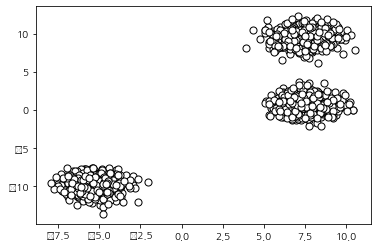

In [3]:
plt.scatter(
   blobs[0][:,0], blobs[0][:,1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

### 같은 크기의 타원형

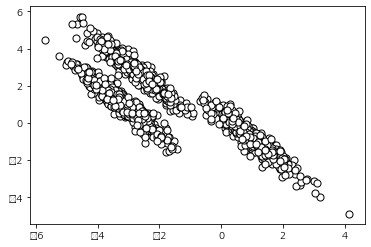

In [4]:
plt.scatter(
   anisotropic[0][:,0], anisotropic[0][:,1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

### 다른 크기의 원형

C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


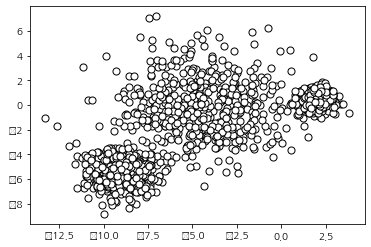

In [31]:
plt.scatter(
   varied[0][:,0], varied[0][:,1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

### 동심원

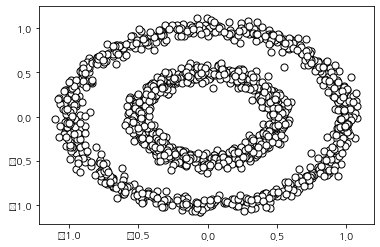

In [5]:
plt.scatter(
   noisy_circles[0][:,0], noisy_circles[0][:,1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

### 초승달

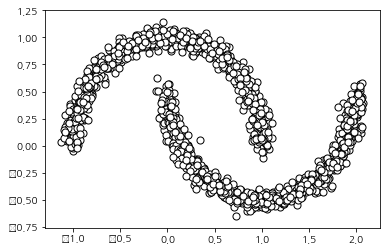

In [6]:
plt.scatter(
   noisy_moons[0][:,0], noisy_moons[0][:,1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

### 비구조화

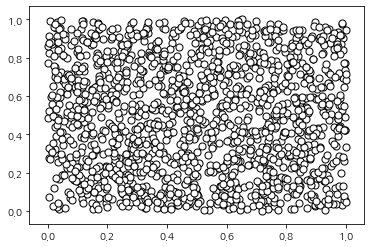

In [7]:
plt.scatter(
   no_structure[0][:,0], no_structure[0][:,1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

## 개별테스트
### K-Means

In [13]:
colors = plt.cm.tab10(np.arange(20, dtype=int))

C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


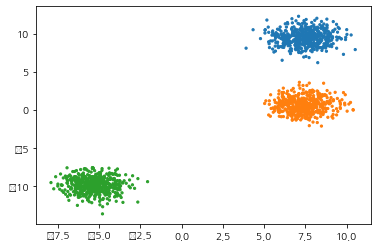

In [14]:
KM = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_pred = KM.fit_predict(blobs[0])

plt.scatter(blobs[0][:,0], blobs[0][:,1], s=5, color=colors[y_pred])
plt.show()

### DB-Scan

C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


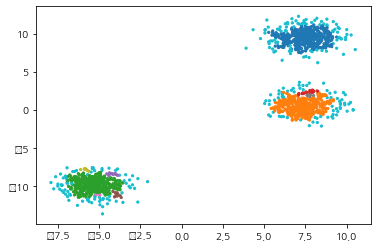

In [15]:
DB = DBSCAN(eps=0.25)
y_pred = DB.fit_predict(blobs[0])

plt.scatter(blobs[0][:,0], blobs[0][:,1], s=5, color=colors[y_pred])
plt.show()

### Spectral Clustering

C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


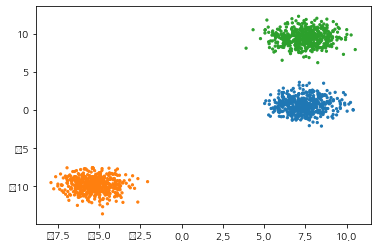

In [16]:
SC = SpectralClustering(n_clusters=3, affinity="nearest_neighbors")
y_pred = SC.fit_predict(blobs[0])

plt.scatter(blobs[0][:,0], blobs[0][:,1], s=5, color=colors[y_pred])
plt.show()

### Agglomerative Clustering

C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


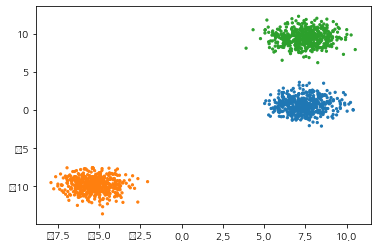

In [17]:
ward = AgglomerativeClustering(n_clusters=3)
y_pred = ward.fit_predict(blobs[0])

plt.scatter(blobs[0][:,0], blobs[0][:,1], s=5, color=colors[y_pred])
plt.show()

### AffinityPropagation

C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Gene\Anaconda3\envs\torch\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


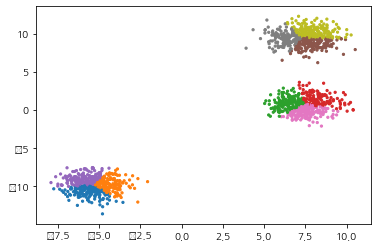

In [18]:
affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
y_pred = affinity_propagation.fit_predict(blobs[0])

plt.scatter(blobs[0][:,0], blobs[0][:,1], s=5, color=colors[y_pred])
plt.show()

## Clustering Algorithm 

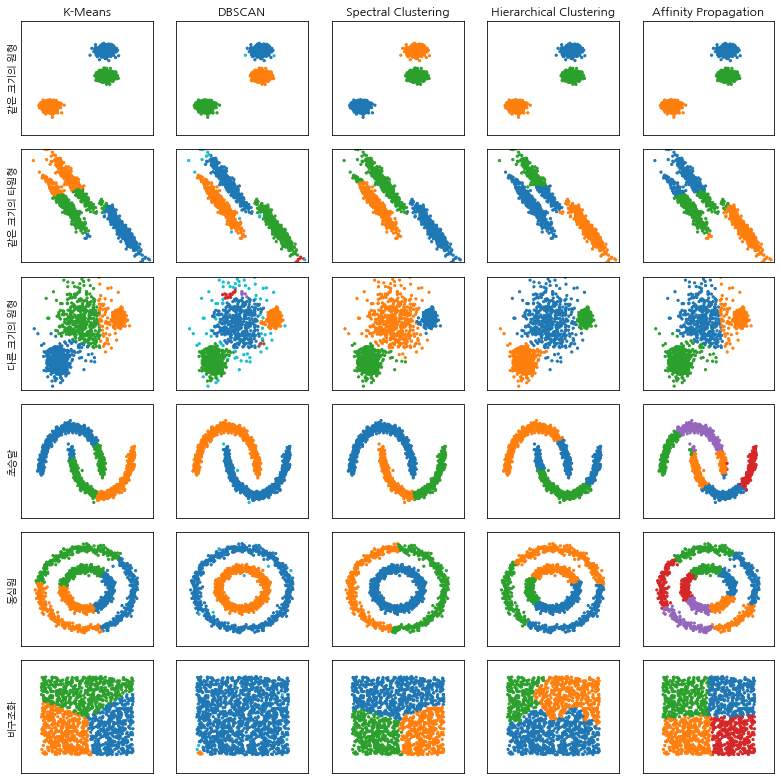

In [19]:
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.utils.testing import ignore_warnings

plt.figure(figsize=(11, 11))
plot_num = 1
for i, (data_name, (X, y)) in enumerate(datasets.items()):
    X = StandardScaler().fit_transform(X)

    two_means = MiniBatchKMeans(n_clusters=3)
    dbscan = DBSCAN(eps=0.15)
    spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors")
    ward = AgglomerativeClustering(n_clusters=3)
    affinity_propagation = AffinityPropagation(damping=0.9, preference=-200)
    clustering_algorithms = (
        ('K-Means', two_means),
        ('DBSCAN', dbscan),
        ('Spectral Clustering', spectral),
        ('Hierarchical Clustering', ward),
        ('Affinity Propagation', affinity_propagation),
    )

    for j, (name, algorithm) in enumerate(clustering_algorithms):
        with ignore_warnings(category=UserWarning):
            algorithm.fit(X)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i == 0:
            plt.title(name)
        if j == 0:
            plt.ylabel(data_name)
        colors = plt.cm.tab10(np.arange(20, dtype=int))
        plt.scatter(X[:, 0], X[:, 1], s=5, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.tight_layout()
plt.show()

## Hierarchical Clustering Dendrogram

In [30]:
dataset = pd.read_csv('./dataset/iris.csv', encoding='utf_8_sig')

label = dataset.iloc[:,-1]
dataset = dataset.iloc[:,:-1]
labels = pd.Series(pd.factorize(label)[0])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=42)

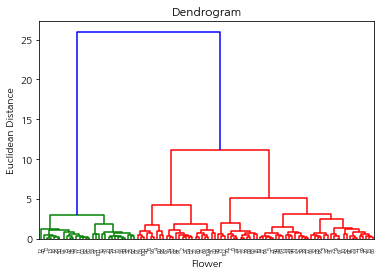

In [28]:
from scipy.cluster import hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(X_train, method='ward')
dendrogram = sch.dendrogram(mergings)

plt.title('Dendrogram')
plt.xlabel('Flower')
plt.ylabel('Euclidean Distance')
plt.show()

In [29]:
from scipy.cluster.hierarchy import fcluster

y_pred = pd.DataFrame(fcluster(mergings, t=10, criterion='distance'))
y_pred.columns=['predict']
ct = pd.crosstab(y_pred['predict'],y_train)
print(ct)

col_0     0   1  2
predict           
1         9   7  0
2         5  13  2
3        16  17  2
